# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer


In [3]:
penguins = load_penguins()
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
penguins = pd.get_dummies(penguins,
                          columns=['species', 'island', 'sex'],
                          drop_first=True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
penguins = penguins.dropna()
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
predictors = [
    ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    ['bill_length_mm', 'species_Chinstrap', 'species_Gentoo'],
    ['flipper_length_mm', 'island_Dream', 'island_Torgersen'],
    ['body_mass_g', 'sex_male']
]
models = []
for preds in predictors:
    model = LinearRegression()
    model.fit(X_train[preds], y_train)  # Fit using specific predictors
    models.append(model)


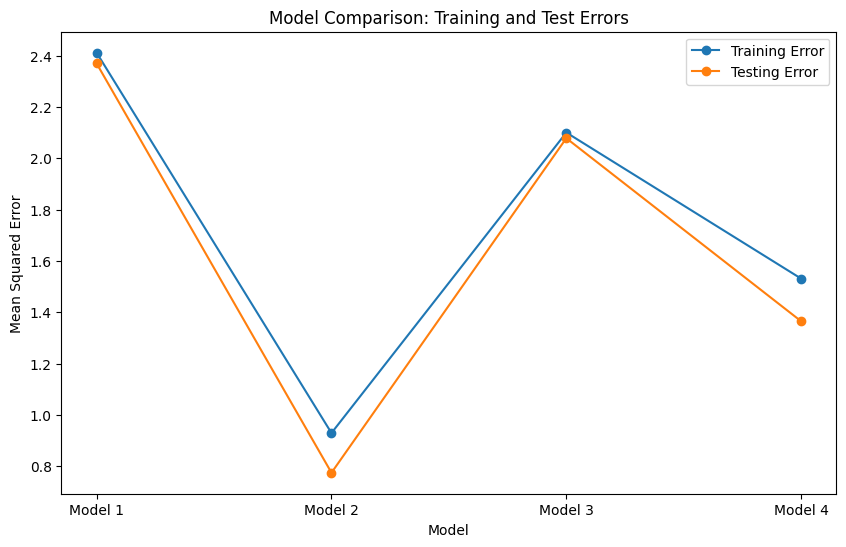

In [11]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

train_errors = []
test_errors = []
for model, preds in zip(models, predictors):
    y_train_pred = model.predict(X_train[preds])
    y_test_pred = model.predict(X_test[preds])
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(models)), train_errors, marker='o', label='Training Error')
plt.plot(np.arange(len(models)), test_errors, marker='o', label='Testing Error')
plt.xticks(np.arange(len(models)), ['Model ' + str(i + 1) for i in range(len(models))])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Model Comparison: Training and Test Errors')
plt.show()

Model 2 was the best model, containing bill_length_mm', 'species_Chinstrap', 'species_Gentoo' as the predictor variables.